In [6]:
!pip install -q matplotlib
!pip install pandas


In [30]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.patches import Rectangle
import random
import numpy as np
import os
import pandas as pd
import matplotlib.font_manager as fm

In [31]:
def rand_cmap(nlabels, type='soft', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in range(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [52]:

pred_folder = "./samples/pred/"
gt_folder =  "./samples/gt/"
saver_folder = "./visualization/"

def get_timestamp(csv_file):
    data = pd.read_csv(csv_file) 
    p_start = data['start'].values.tolist()
    p_end = data['stop'].values.tolist()
    p_label = data['ID'].values.tolist()
    
    return p_start, p_end, p_label
def visualize(video_name):
    video_name = video_name[:-4]
    
    
    start_t, end_t, labels = get_timestamp(gt_folder+video_name+'.csv')
    pstart_t, pend_t, plabels = get_timestamp(pred_folder+video_name+'.csv')
    #labels =[i - 1 for i in labels]

    cmap = np.random.rand(20,3)

    fig, ax = plt.subplots(figsize=(25,5))
    #create simple line plot
    lw = 5
    plt.plot([0, 0],[0,3])
    plt.plot([0, end_t[-1]],[1,1], label='GT', lw = lw)
    plt.plot([0, end_t[-1]],[2.5,2.5],  label='Predict' , lw = lw)
    #add rectangle to plot
    h = 1
    for i, label in enumerate(labels):
     
        w = end_t[i] - start_t[i]
        xy = (start_t[i], 0+1)
        ax.add_patch(Rectangle(xy, w, h, facecolor = cmap[labels[i]-1]))
    same_labels_list = []    
    for i, label in enumerate(labels):
        same_labels_list.append(i)
        if (i==len(labels)-1) or  (not label == labels[i+1]):

            middle = int(sum(same_labels_list)/len(same_labels_list))
            # plt.text(start_t[middle], 0, str(label))
            same_labels_list = []    

    for i, label in enumerate(plabels):
        
        w = pend_t[i] - pstart_t[i]
        xy = (pstart_t[i], 0+2.5)
        ax.add_patch(Rectangle(xy, w, h, facecolor = cmap[plabels[i]-1]))
    same_labels_list = []    
    for i, label in enumerate(plabels):
        same_labels_list.append(i)
        if (i==len(plabels)-1) or  (not label == plabels[i+1]):

            middle = int(sum(same_labels_list)/len(same_labels_list))
            # plt.text(pstart_t[middle], 6, str(label))
            same_labels_list = []
    # add legend for each segment
    for i in range(len(cmap)):
        ax.add_patch(Rectangle((0, 0), 1, 1, color=cmap[i], label=str(i+1)))
    ax.set_xlim(0, end_t[-1])
    ax.set_ylim(0, 3)
    ax.set_xlabel('Time (frame number)')
    ax.set_yticks([0.5, 2.5, 4.5, 6.5])
    ax.set_yticklabels(['GT', ' ', 'Predict', ' '])

    


    ax.legend()
    plt.title(video_name)
    os.makedirs(saver_folder, exist_ok=True)  
    plt.savefig(saver_folder+video_name+'.png')
    plt.savefig(saver_folder+video_name+'.eps')

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

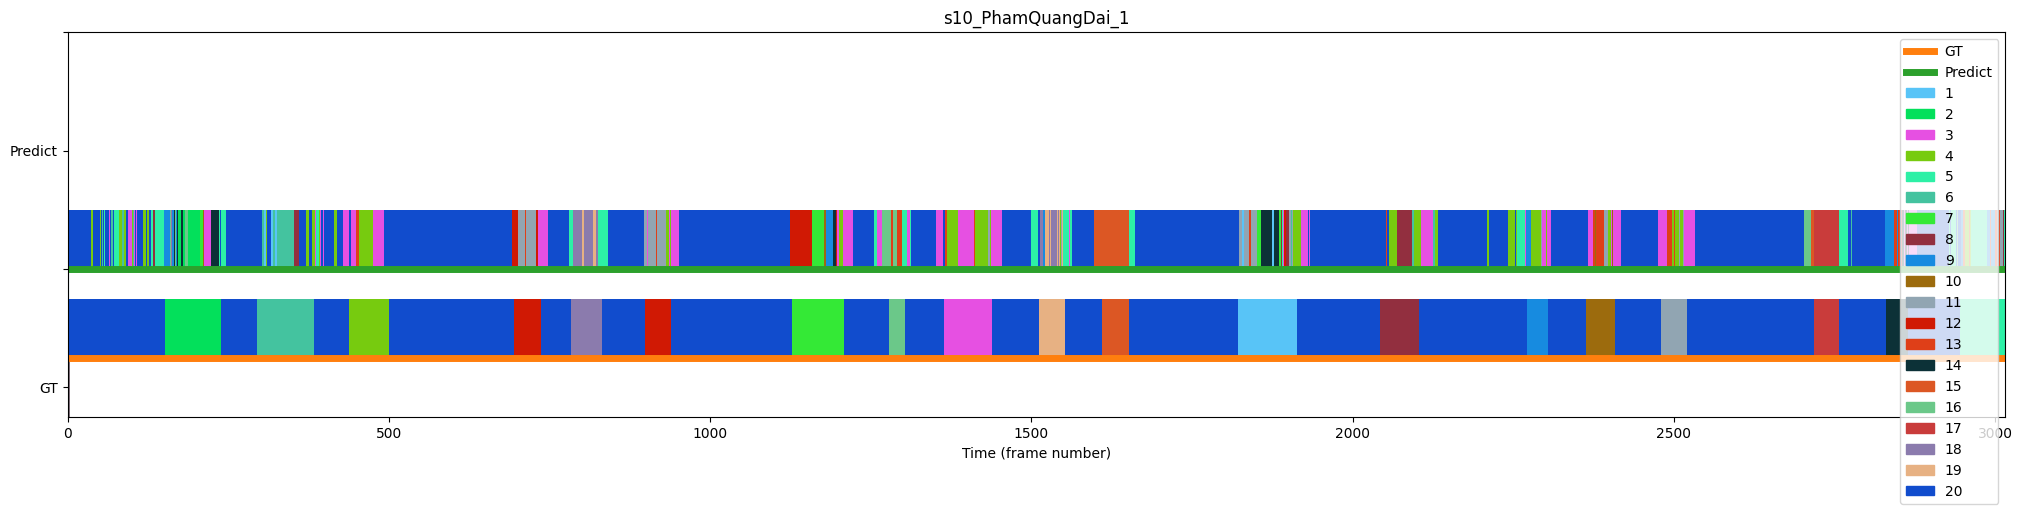

In [53]:
visualize('s10_PhamQuangDai_1.csv')